# Documentação 1 - Como visualizar as imagens em formato .dcm usando pydicom

O primeiro passo para obter as imagens foi a instalação do software NBIA Data Retriver. Com o software instalado, a partir do link https://www.cancerimagingarchive.net/collection/breast-cancer-screening-dbt/, é possível selecionar quais imagens instalar.

As imagens instaladas para esse teste foram as do Testset - Images.

Quando clicamos no search, o site nos redireciona para um outro link, no qual podemos escolher quais imagens baixar. Na aba 'Search Results', foram escolhidas apenas as imagens da 1a página como teste.

Interessantemente, quando pedimos para baixá-las, em vez de instalar as imagens o site instala um manifest do tipo .tcia, o qual quando rodado abre o NBIA Data Retriver, que instala as imagens em um folder especificado.

No folder especificado são instaladas uma pasta que contém várias outras pastas (Breast-Cancer-Screening-DBT) e um arquivo .csv (metadata.csv), que contém as informações de cada imagem baixada.

Dentro da pasta Breast-Cancer-Screening-DBT, há pastas que representam, ao meu entendimento, imagens categorizadas por paciente. Dentro dessas pastas, há mais pastas para cada imagem da mamografia.



In [1]:
#Imports 
import pydicom as dicom
import matplotlib.pylab as plt
import pandas as pd
import os
import numpy as np
from tabulate import tabulate

In [2]:
file_path = r'D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\metadata.csv'

df = pd.read_csv(file_path)

df.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.2.826.0.1.3680043.8.498.49960920027419898262576649453256350046,Breast-Cancer-Screening-DBT,NO,https://doi.org/10.7937/e4wtcd02,DBT-P00004,1.2.826.0.1.3680043.8.498.11885333978592208408...,MAMMO screening digital bilateral,01-01-2000,NaN,HOLOGIC Inc.,MG,Breast Tomosynthesis Image Storage,1.2.840.10008.5.1.4.1.1.13.1.3,1,114,12 MB,.\Breast-Cancer-Screening-DBT\DBT-P00004\01-01...,2024-02-16T08:24:19.928
1.2.826.0.1.3680043.8.498.10083100628218556265626118868399870893,Breast-Cancer-Screening-DBT,NO,https://doi.org/10.7937/e4wtcd02,DBT-P00004,1.2.826.0.1.3680043.8.498.11885333978592208408...,MAMMO screening digital bilateral,01-01-2000,NaN,HOLOGIC Inc.,MG,Breast Tomosynthesis Image Storage,1.2.840.10008.5.1.4.1.1.13.1.3,1,92,15 MB,.\Breast-Cancer-Screening-DBT\DBT-P00004\01-01...,2024-02-16T08:24:25.645
1.2.826.0.1.3680043.8.498.19746584038558335600059982311276295394,Breast-Cancer-Screening-DBT,NO,https://doi.org/10.7937/e4wtcd02,DBT-P00004,1.2.826.0.1.3680043.8.498.11885333978592208408...,MAMMO screening digital bilateral,01-01-2000,NaN,HOLOGIC Inc.,MG,Breast Tomosynthesis Image Storage,1.2.840.10008.5.1.4.1.1.13.1.3,1,66,86 MB,.\Breast-Cancer-Screening-DBT\DBT-P00004\01-01...,2024-02-16T08:24:29.744
1.2.826.0.1.3680043.8.498.12372207292716674880228073926463607168,Breast-Cancer-Screening-DBT,NO,https://doi.org/10.7937/e4wtcd02,DBT-P00021,1.2.826.0.1.3680043.8.498.74613916159795176576...,MAMMO screening digital bilateral,01-01-2000,NaN,HOLOGIC Inc.,MG,Breast Tomosynthesis Image Storage,1.2.840.10008.5.1.4.1.1.13.1.3,1,35,66 MB,.\Breast-Cancer-Screening-DBT\DBT-P00021\01-01...,2024-02-16T08:24:55.124
1.2.826.0.1.3680043.8.498.78814460186026637151897262995794744222,Breast-Cancer-Screening-DBT,NO,https://doi.org/10.7937/e4wtcd02,DBT-P00004,1.2.826.0.1.3680043.8.498.11885333978592208408...,MAMMO screening digital bilateral,01-01-2000,NaN,HOLOGIC Inc.,MG,Breast Tomosynthesis Image Storage,1.2.840.10008.5.1.4.1.1.13.1.3,1,70,88 MB,.\Breast-Cancer-Screening-DBT\DBT-P00004\01-01...,2024-02-16T08:25:21.722


C:\Users\breno\anaconda3\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


TypeError: Invalid shape (70, 2457, 1890) for image data

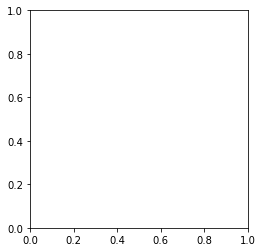

In [3]:
image_path = r'D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00004\01-01-2000-DBT-S03764-MAMMO screening digital bilateral-73497\11920.000000-NA-70893\1-1.dcm'

ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

Fazer das formas acima nos dá um erro para as imagens devido ao seu formato. A forma correta para a visualização das imagens, colocando a visualização em tons de cinza é:

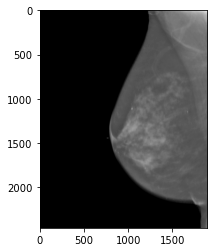

In [4]:
image_path = r'D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00004\01-01-2000-DBT-S03764-MAMMO screening digital bilateral-73497\11920.000000-NA-70893\1-1.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array.mean(axis=0), cmap = 'gray')

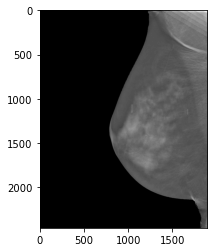

In [5]:
#Ou também:
plt.imshow(ds.pixel_array[0], cmap="gray")

Podemos também tentar colocar todas as imagens em uma lista para armazená-las no mesmo local, o que pode facilitar para o futuro treinamento da rede:

In [6]:
def read_dicom(dir):
    #Para armazenar as imagens
    dicom_images = []

    #Travessia pela path
    for root, dirs, files in os.walk(dir):
        for file in files:
            #Checa se é do tipo .dcm
            if file.endswith('.dcm'):
                #Pega a path inteira do arquivo .dcm
                dicom_file_path = os.path.join(root, file)
                try:
                    #Lê o .dcm
                    ds = dicom.dcmread(dicom_file_path)
                    #Adiciona o array de pixels na lista
                    dicom_images.append(ds.pixel_array)
                except Exception as e:
                    print(f"Erro na leitura: {dicom_file_path}: {str(e)}")
    
    return dicom_images

#Se necssário podemos converter para np array se formos usá-las com tf
#dicom_images_array = np.array(dicom_images)

In [7]:
root_dir = r'D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT'
images = read_dicom(root_dir)

Erro na leitura: D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00087\01-01-2000-DBT-S04170-MAMMO screening digital bilateral-13031\18035.000000-NA-42700\1-1.dcm: 
Erro na leitura: D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00087\01-01-2000-DBT-S04170-MAMMO screening digital bilateral-13031\18036.000000-NA-06047\1-1.dcm: 
Erro na leitura: D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00087\01-01-2000-DBT-S04170-MAMMO screening digital bilateral-13031\18037.000000-NA-64410\1-1.dcm: 
Erro na leitura: D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00087\01-01-2000-DBT-S04170-MAMMO screening digital bilateral-13031\18038.000000-NA-88999\1-1.dcm: 
Erro na leitura: D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00092\01-01-2000-DBT-S01654-MAMMO screening digital bil

Pode-se perceber que houve erros em ler algumas das imagens. Convém analisar como foi feita também o processamento das imagens em https://github.com/mazurowski-lab/duke-dbt-data/tree/master, mas não consegui utilziar o docker.

Podemos visualizar as imagens diretamente da lista:

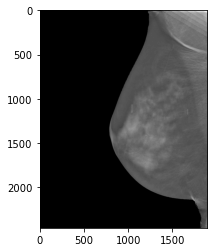

In [8]:
plt.imshow(images[0][0], cmap="gray")

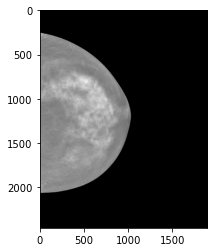

In [9]:
plt.imshow(images[1][0], cmap="gray")

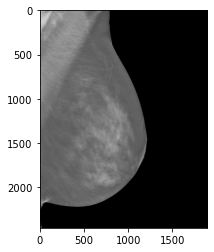

In [10]:
plt.imshow(images[2][0], cmap="gray")

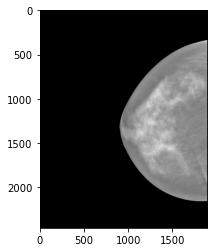

In [11]:
plt.imshow(images[3][0], cmap="gray")

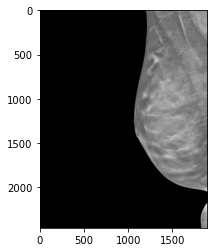

In [12]:
plt.imshow(images[4][0], cmap="gray")

Link interessantes que encontrei: https://www.kaggle.com/code/micheldc55/how-to-read-dcm-dicom-data
https://arxiv.org/abs/2011.07995

Convém analisar o .csv relacionado ao test set, que pode ser baixado na mesma página dos outros sets.

In [13]:
df = pd.read_csv(r'D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\BCS-DBT-labels-test-PHASE-2.csv')

In [14]:
df.head(10)

,PatientID,StudyUID,View,Normal,Actionable,Benign,Cancer
0,DBT-P00882,DBT-S04273,lcc,0,0,0,1
1,DBT-P00882,DBT-S04273,lmlo,0,0,0,1
2,DBT-P01803,DBT-S04833,rcc,0,0,0,1
3,DBT-P01803,DBT-S04833,rmlo,0,0,0,1
4,DBT-P01183,DBT-S04722,rcc,0,0,0,1
5,DBT-P01183,DBT-S04722,rmlo,0,0,0,1
6,DBT-P04982,DBT-S03578,rcc,0,0,0,1
7,DBT-P04982,DBT-S03578,rmlo,0,0,0,1
8,DBT-P01367,DBT-S02773,rcc,0,0,0,1
9,DBT-P01367,DBT-S02773,rmlo,0,0,0,1


In [15]:
df[df["PatientID"] == "DBT-P00004"]

,PatientID,StudyUID,View,Normal,Actionable,Benign,Cancer
441,DBT-P00004,DBT-S03764,lcc,1,0,0,0
442,DBT-P00004,DBT-S03764,lmlo,1,0,0,0
443,DBT-P00004,DBT-S03764,rcc,1,0,0,0
444,DBT-P00004,DBT-S03764,rmlo,1,0,0,0


As últimas 4 colunas do .csv representam um one-hot do diagnóstico de pacientes, de acordo com o paper.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PatientID   1721 non-null   object
 1   StudyUID    1721 non-null   object
 2   View        1721 non-null   object
 3   Normal      1721 non-null   int64 
 4   Actionable  1721 non-null   int64 
 5   Benign      1721 non-null   int64 
 6   Cancer      1721 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 94.2+ KB


Text(0.5, 1.0, 'Frequencia de categoria one hot no dataset de teste')

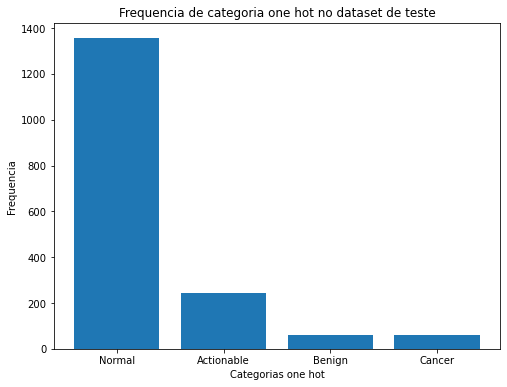

In [17]:
one_hot_sum = df[['Normal', 'Actionable', 'Benign', 'Cancer']].sum()

plt.figure(figsize=(8, 6))

plt.bar(['Normal', 'Actionable', 'Benign', 'Cancer'], one_hot_sum)

plt.xlabel('Categorias one hot')
plt.ylabel('Frequencia')
plt.title('Frequencia de categoria one hot no dataset de teste')

Uma possível ideia do que fazer - relacionar cada imagem a partir do patient ID (que são os nomes das pastas de cada paciente) com as colunas de PatientID do arquivo .csv para pegar os labels que estão em one-hot.

Vamos ver o que acontece se eu tentar abrir diretamente uma das imagens que falharam na função:

D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00087\01-01-2000-DBT-S04170-MAMMO screening digital bilateral-13031\18036.000000-NA-06047\1-1.dcm:

In [18]:
#1o erro
image_path = r'D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00087\01-01-2000-DBT-S04170-MAMMO screening digital bilateral-13031\18036.000000-NA-06047\1-1.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array.mean(axis=0), cmap = 'gray')

MemoryError: 

In [19]:
#2o erro
image_path = r'D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00087\01-01-2000-DBT-S04170-MAMMO screening digital bilateral-13031\18037.000000-NA-64410\1-1.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array.mean(axis=0), cmap = 'gray')

MemoryError: 

In [20]:
#Ultimo erro
image_path = r'D:\Coisinhas\Coisas_UNB\TCC\Imagens\manifest-1708019969874\Breast-Cancer-Screening-DBT\DBT-P00118\01-01-2000-DBT-S05386-MAMMO screening digital bilateral-70928\7700.000000-NA-94977\1-1.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array.mean(axis=0), cmap = 'gray')

MemoryError: 

Os casos com erro retornam um MemoryError por algum motivo. Eu pensei que talvez fosse o tamanho das imagens, mas a imagem logo antes do 1o erro é maior que ele.